In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("adult_with_headers.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
normal_features = data.loc[:,['age'	,'fnlwgt',	'education_num',	'capital_gain',	'capital_loss',	'hours_per_week']]
normal_features

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [8]:
## Scaling Technique
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_standard = StandardScaler() 
scaler_minmax = MinMaxScaler()

In [9]:
# Differentiating numerical columns and categorical columns
num_cols = data.select_dtypes(exclude='object').columns
cat_cols = data.select_dtypes(include='object').columns
num_cols, cat_cols

(Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
        'hours_per_week'],
       dtype='object'),
 Index(['workclass', 'education', 'marital_status', 'occupation',
        'relationship', 'race', 'sex', 'native_country', 'income'],
       dtype='object'))

In [10]:
## Applying scaling method to numerical column 
scaler_standard = StandardScaler()
standardscaler = scaler_standard.fit_transform(normal_features)

In [11]:
#MinMax Scaler
scaler_minmax = MinMaxScaler(feature_range=(0,1))
minmaxscaler = scaler_minmax.fit_transform(normal_features)
minmaxscaler

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

To change the rate of data points

In [12]:
#MinMax Scaler
scaler_minmax = MinMaxScaler(feature_range=(5,10))
minmaxscaler = scaler_minmax.fit_transform(normal_features)
minmaxscaler

array([[6.50684932, 5.22150949, 9.        , 5.10870109, 5.        ,
        6.98979592],
       [7.26027397, 5.24118798, 9.        , 5.        , 5.        ,
        5.6122449 ],
       [6.43835616, 5.69056723, 7.66666667, 5.        , 5.        ,
        6.98979592],
       ...,
       [7.80821918, 5.47413442, 7.66666667, 5.        , 5.        ,
        6.98979592],
       [5.34246575, 5.64249671, 7.66666667, 5.        , 5.        ,
        5.96938776],
       [7.39726027, 5.9360169 , 7.66666667, 5.75120751, 5.        ,
        6.98979592]])


Scaling Type:

MinMaxScaler: Scales data to a specific range (usually [0, 1]).

StandardScaler: Scales data to have a mean of 0 and a standard deviation of 1.

Effect on Data Distribution:

MinMaxScaler: Preserves the original distribution but rescales the range.

StandardScaler: Changes the distribution to a standard normal distribution.

sensitivity to Outliers:

MinMaxScaler: Sensitive to outliers because it uses the minimum and maximum values for scaling.

StandardScaler: Less sensitive to outliers as it uses mean and standard deviation.

Use Cases:

MinMaxScaler: Best when you need a fixed range or when working with algorithms that assume data is bounded within a specific range.

StandardScaler: Best when features need to be normalized to zero mean and unit variance or when algorithms assume normally distributed data

**Encoding Techniques**

In [13]:
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [14]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [17]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [18]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [19]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [20]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [21]:
data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [22]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [23]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
data = pd.get_dummies(data, columns=['race','sex','income'])
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,United-States,0,0,0,0,1,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,United-States,0,0,0,0,1,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,United-States,0,0,0,0,1,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,United-States,0,0,1,0,0,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,Cuba,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,...,United-States,0,0,0,0,1,1,0,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,...,United-States,0,0,0,0,1,0,1,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,...,United-States,0,0,0,0,1,1,0,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,...,United-States,0,0,0,0,1,0,1,1,0


In [25]:
data.replace({True:1, False:0}, inplace = True)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,United-States,0,0,0,0,1,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,United-States,0,0,0,0,1,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,United-States,0,0,0,0,1,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,United-States,0,0,1,0,0,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,Cuba,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,...,United-States,0,0,0,0,1,1,0,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,...,United-States,0,0,0,0,1,0,1,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,...,United-States,0,0,0,0,1,1,0,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,...,United-States,0,0,0,0,1,0,1,1,0


In [26]:
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [27]:
data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

#Applying labelEncoder to each categorical column

encoded_data  = data.copy() #Making copy so that modificatiob doewnt affect original data

for column in data.columns:
    encoded_data[column] = lb.fit_transform(data[column])
    
print("Encoded Data Frame:")
data1=pd.DataFrame(encoded_data)
data1

Encoded Data Frame:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,22,7,2671,9,12,4,1,1,25,0,...,39,0,0,0,0,1,0,1,1,0
1,33,6,2926,9,12,2,4,0,0,0,...,39,0,0,0,0,1,0,1,1,0
2,21,4,14086,11,8,0,6,1,0,0,...,39,0,0,0,0,1,0,1,1,0
3,36,4,15336,1,6,2,6,0,0,0,...,39,0,0,1,0,0,0,1,1,0
4,11,4,19355,9,12,2,10,5,0,0,...,5,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,0,0,...,39,0,0,0,0,1,1,0,1,0
32557,23,4,8080,11,8,2,7,0,0,0,...,39,0,0,0,0,1,0,1,0,1
32558,41,4,7883,11,8,6,1,4,0,0,...,39,0,0,0,0,1,1,0,1,0
32559,5,4,12881,11,8,4,1,3,0,0,...,39,0,0,0,0,1,0,1,1,0


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       32561 non-null  int64
 1   workclass                 32561 non-null  int32
 2   fnlwgt                    32561 non-null  int64
 3   education                 32561 non-null  int32
 4   education_num             32561 non-null  int64
 5   marital_status            32561 non-null  int32
 6   occupation                32561 non-null  int32
 7   relationship              32561 non-null  int32
 8   capital_gain              32561 non-null  int64
 9   capital_loss              32561 non-null  int64
 10  hours_per_week            32561 non-null  int64
 11  native_country            32561 non-null  int32
 12  race_ Amer-Indian-Eskimo  32561 non-null  int64
 13  race_ Asian-Pac-Islander  32561 non-null  int64
 14  race_ Black               32561 non-nu

## 3. Feature Engineering:


In [30]:
data1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,22,7,2671,9,12,4,1,1,25,0,...,39,0,0,0,0,1,0,1,1,0
1,33,6,2926,9,12,2,4,0,0,0,...,39,0,0,0,0,1,0,1,1,0
2,21,4,14086,11,8,0,6,1,0,0,...,39,0,0,0,0,1,0,1,1,0
3,36,4,15336,1,6,2,6,0,0,0,...,39,0,0,1,0,0,0,1,1,0
4,11,4,19355,9,12,2,10,5,0,0,...,5,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,0,0,...,39,0,0,0,0,1,1,0,1,0
32557,23,4,8080,11,8,2,7,0,0,0,...,39,0,0,0,0,1,0,1,0,1
32558,41,4,7883,11,8,6,1,4,0,0,...,39,0,0,0,0,1,1,0,1,0
32559,5,4,12881,11,8,4,1,3,0,0,...,39,0,0,0,0,1,0,1,1,0


In [31]:
data1['Total_Income'] = data['capital_gain'] - data['capital_loss']

In [32]:
data1['Total_Income']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: Total_Income, Length: 32561, dtype: int64

In [33]:
data1['Total_Income'].value_counts()

 0        28330
 15024      347
 7688       284
 7298       246
-1902       202
          ...  
-1844         1
 1111         1
 2538         1
-2489         1
-1411         1
Name: Total_Income, Length: 210, dtype: int64

In [34]:
data1['education_num'].value_counts()

8     10501
9      7291
12     5355
13     1723
10     1382
6      1175
11     1067
5       933
3       646
14      576
4       514
7       433
15      413
2       333
1       168
0        51
Name: education_num, dtype: int64

In [35]:
def categorize_education(education_num):
    if education_num <= 5:
        return 'elimentary School'
    elif education_num <= 10:
        return 'High School'
    elif education_num <= 12:
        return 'intermediate'
    elif education_num <= 16:
        return 'Bachelor Degree'
    else:
        return 'Graduate Degree'

# Apply categorization
data1['Education_Level'] = data1['education_num'].apply(categorize_education)


In [36]:
data1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Total_Income,Education_Level
0,22,7,2671,9,12,4,1,1,25,0,...,0,0,0,1,0,1,1,0,2174,intermediate
1,33,6,2926,9,12,2,4,0,0,0,...,0,0,0,1,0,1,1,0,0,intermediate
2,21,4,14086,11,8,0,6,1,0,0,...,0,0,0,1,0,1,1,0,0,High School
3,36,4,15336,1,6,2,6,0,0,0,...,0,1,0,0,0,1,1,0,0,High School
4,11,4,19355,9,12,2,10,5,0,0,...,0,1,0,0,1,0,1,0,0,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,0,0,...,0,0,0,1,1,0,1,0,0,intermediate
32557,23,4,8080,11,8,2,7,0,0,0,...,0,0,0,1,0,1,0,1,0,High School
32558,41,4,7883,11,8,6,1,4,0,0,...,0,0,0,1,1,0,1,0,0,High School
32559,5,4,12881,11,8,4,1,3,0,0,...,0,0,0,1,0,1,1,0,0,High School


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'marital_status'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>, <Axes: >]],
      dtype=object)

<Figure size 1000x1500 with 0 Axes>

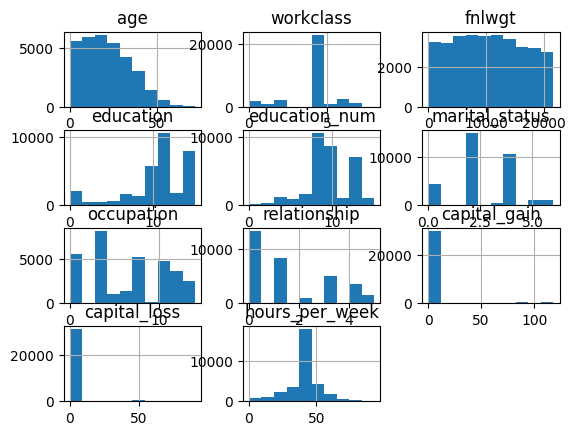

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,15))
data1.iloc[:,:11].hist()

In [38]:
#applying log transformation to fnlwt

import numpy as np
data1['log_occupation'] = np.log(data1['occupation'])

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
data1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Total_Income,Education_Level,log_occupation
0,22,7,2671,9,12,4,1,1,25,0,...,0,0,1,0,1,1,0,2174,intermediate,0.000000
1,33,6,2926,9,12,2,4,0,0,0,...,0,0,1,0,1,1,0,0,intermediate,1.386294
2,21,4,14086,11,8,0,6,1,0,0,...,0,0,1,0,1,1,0,0,High School,1.791759
3,36,4,15336,1,6,2,6,0,0,0,...,1,0,0,0,1,1,0,0,High School,1.791759
4,11,4,19355,9,12,2,10,5,0,0,...,1,0,0,1,0,1,0,0,intermediate,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,0,0,...,0,0,1,1,0,1,0,0,intermediate,2.564949
32557,23,4,8080,11,8,2,7,0,0,0,...,0,0,1,0,1,0,1,0,High School,1.945910
32558,41,4,7883,11,8,6,1,4,0,0,...,0,0,1,1,0,1,0,0,High School,0.000000
32559,5,4,12881,11,8,4,1,3,0,0,...,0,0,1,0,1,1,0,0,High School,0.000000


##  4. Feature Selection:

In [40]:
data1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Total_Income,Education_Level,log_occupation
0,22,7,2671,9,12,4,1,1,25,0,...,0,0,1,0,1,1,0,2174,intermediate,0.000000
1,33,6,2926,9,12,2,4,0,0,0,...,0,0,1,0,1,1,0,0,intermediate,1.386294
2,21,4,14086,11,8,0,6,1,0,0,...,0,0,1,0,1,1,0,0,High School,1.791759
3,36,4,15336,1,6,2,6,0,0,0,...,1,0,0,0,1,1,0,0,High School,1.791759
4,11,4,19355,9,12,2,10,5,0,0,...,1,0,0,1,0,1,0,0,intermediate,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,0,0,...,0,0,1,1,0,1,0,0,intermediate,2.564949
32557,23,4,8080,11,8,2,7,0,0,0,...,0,0,1,0,1,0,1,0,High School,1.945910
32558,41,4,7883,11,8,6,1,4,0,0,...,0,0,1,1,0,1,0,0,High School,0.000000
32559,5,4,12881,11,8,4,1,3,0,0,...,0,0,1,0,1,1,0,0,High School,0.000000


In [41]:
from sklearn.ensemble import IsolationForest

In [42]:
#X = data1.drop('Education_Level', axis = 1)
X = data1.iloc[:,:-5]
# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.2)  # 'contamination' is the expected proportion of outliers

# Fit the model
iso_forest.fit(X)

IsolationForest(contamination=0.2)

In [43]:
#predicting anomolies
y_pred = iso_forest.predict(X)
y_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [44]:
#removing anomolies
x_no_outliers = X[y_pred == 1]
x_no_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,22,7,2671,9,12,4,1,1,25,0,39,39,0,0,0,0,1,0,1
1,33,6,2926,9,12,2,4,0,0,0,12,39,0,0,0,0,1,0,1
2,21,4,14086,11,8,0,6,1,0,0,39,39,0,0,0,0,1,0,1
5,20,4,17700,12,13,2,4,5,0,0,39,39,0,0,0,0,1,1,0
7,35,6,13620,11,8,2,4,0,0,0,44,39,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5,4,18560,15,9,4,11,1,0,0,39,39,0,0,0,0,1,0,1
32556,10,4,16528,7,11,2,13,5,0,0,37,39,0,0,0,0,1,1,0
32557,23,4,8080,11,8,2,7,0,0,0,39,39,0,0,0,0,1,0,1
32558,41,4,7883,11,8,6,1,4,0,0,39,39,0,0,0,0,1,1,0


In [45]:
pip install ppscore

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
import ppscore as pps

pps_matrix = pps.matrix(x_no_outliers)
print(pps_matrix)

             x              y   ppscore            case  is_valid_score  \
0          age            age  1.000000  predict_itself            True   
1          age      workclass  0.000000      regression            True   
2          age         fnlwgt  0.001003      regression            True   
3          age      education  0.000000      regression            True   
4          age  education_num  0.000000      regression            True   
..         ...            ...       ...             ...             ...   
356  sex_ Male    race_ Black  0.000000      regression            True   
357  sex_ Male    race_ Other  0.000000      regression            True   
358  sex_ Male    race_ White  0.000000      regression            True   
359  sex_ Male    sex_ Female  1.000000      regression            True   
360  sex_ Male      sex_ Male  1.000000  predict_itself            True   

                  metric  baseline_score  model_score                    model  
0                 

In [47]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.6550,0.763232,DecisionTreeRegressor()
2,age,fnlwgt,0.001003,regression,True,mean absolute error,5150.1020,5144.937286,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.3992,2.478663,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.7654,1.843061,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
356,sex_ Male,race_ Black,0.000000,regression,True,mean absolute error,0.0250,0.048740,DecisionTreeRegressor()
357,sex_ Male,race_ Other,0.000000,regression,True,mean absolute error,0.0004,0.000800,DecisionTreeRegressor()
358,sex_ Male,race_ White,0.000000,regression,True,mean absolute error,0.0254,0.049496,DecisionTreeRegressor()
359,sex_ Male,sex_ Female,1.000000,regression,True,mean absolute error,0.2840,0.000000,DecisionTreeRegressor()
